# Imbalanced Learn - Trabalhando com datasets desbalanceados 

In [1]:
# Instalando a biblioteca
#!pip install -U imbalanced-learn

### Importando e visualizando a base

In [2]:
import pandas as pd
base = pd.read_excel('BaseInadimplencia.xlsx')
base.head(3)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-1.992492,-4.158429,0
2,-3.910816,-0.874096,0


### Contando a quantidade de valores

In [3]:
base.Situacao.value_counts()

Situacao
0    150
1     15
Name: count, dtype: int64

### Visualizando graficamente

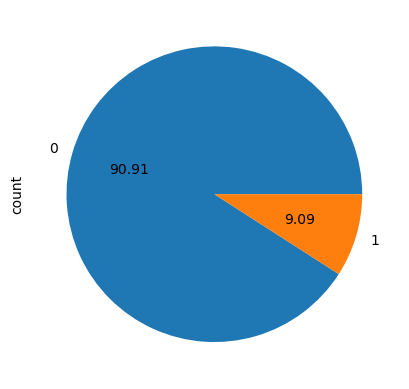

In [4]:
base.Situacao.value_counts().plot.pie(autopct='%.2f');

# Como podemos resolver esse problema?
- Temos 2 classes:
    - Classe **majoritária**: a que possui **mais** registros
    - Classe **minoritária**: a que possui **menos** registros

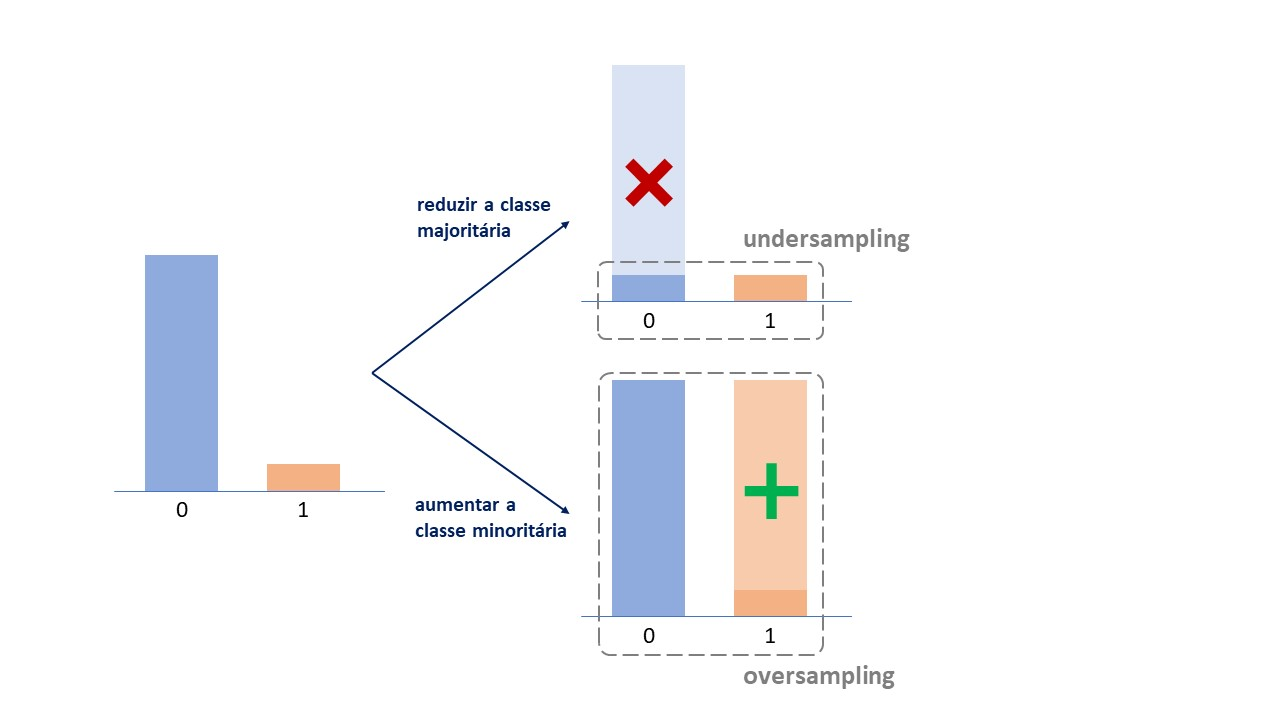

### Separando X e Y

In [5]:
X = base.drop('Situacao',axis=1)
y = base.Situacao

# UnderSampler
### Reduzindo  classe majoritária

## RandomUnderSampler
### Excluindo registros de forma aleatória

In [6]:
from imblearn.under_sampling import RandomUnderSampler 

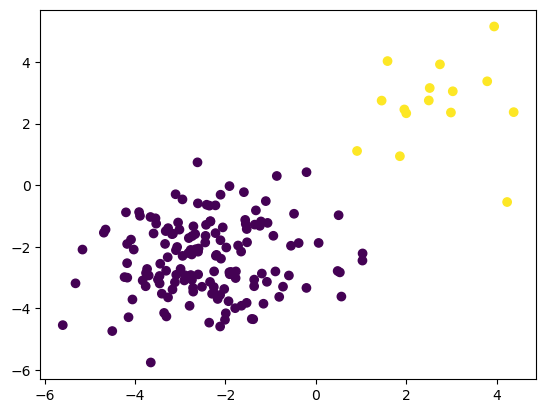

In [7]:
# Visualizando a distribuição dos dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)

plt.show()

### Instanciando e fazendo fit

In [8]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

### Contando os valores

In [9]:
y_res.value_counts()

Situacao
0    15
1    15
Name: count, dtype: int64

## Visualizando graficamente a exclusão aleatoria

Os pontos vermelhos são os selecionados

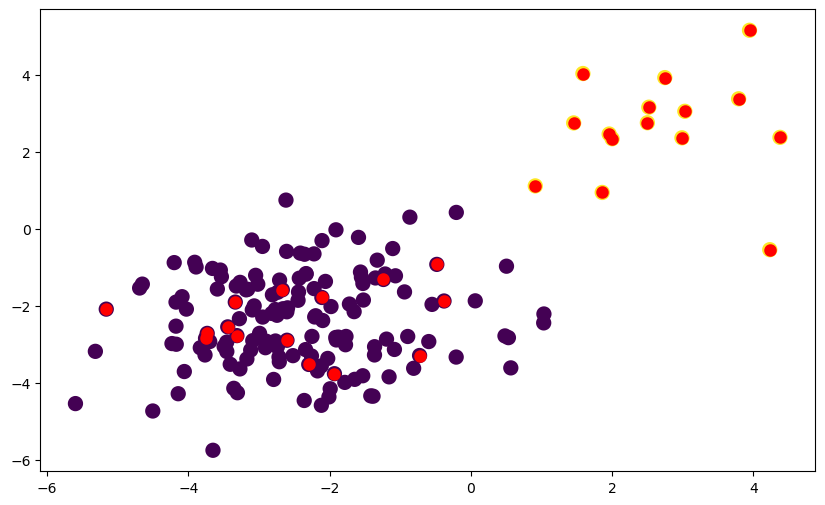

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3)

plt.show()

# ClusterCentroids
- Irá gerar novas amostras baseado no KMeans: Selecionar os pontos mais centrais para que expliqhem melhor todos os pontos


In [11]:
from imblearn.under_sampling import ClusterCentroids 

### Instanciando e fazendo fit

In [15]:
cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(X, y)

### Visualizando graficamente

Selecionou os pontos mais centrais

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.5)

plt.show()

<img src="ClusterCentroids.png">

# NearMiss
- Mantem os pontos mais perto da linha de divisão para manter a reta de divisao no mesmo lugar
- Ou seja, os pontos mais proximos da outra classe

In [19]:
from imblearn.under_sampling import NearMiss 

### Instanciando e fazendo fit

In [20]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

### Vsualizando graficamente

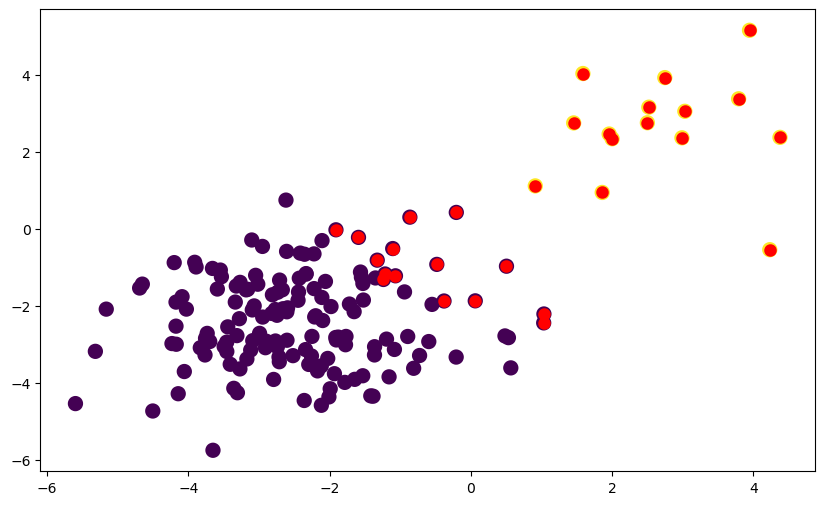

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3)

plt.show()

**Existem várias outras formas de fazermos o undersampling e todas elas são explicadas na própria documentação**<br>
**https://imbalanced-learn.org/stable/under_sampling.html#**

# Oversampling
### Aumentando classe minoritaria

## RandomOverSampler
- Duplica os valores também de maneira aleatória

In [22]:
from imblearn.over_sampling import RandomOverSampler 

### Contando inicialmente

In [27]:
y.value_counts()

Situacao
0    150
1     15
Name: count, dtype: int64

### Instanciando e fazendo fit

In [23]:
ros = RandomOverSampler(random_state=42,shrinkage=0.5)
X_res, y_res = ros.fit_resample(X, y)

### Contando novamente

In [28]:
y_res.value_counts()

Situacao
0    150
1    150
Name: count, dtype: int64

### Se a repetição dos dados for um problema, podemos utilizar o parâmetro `shrinkage`
- Quando o parâmetro for passado, ele vai gerar uma "suavização" nos dados

## SMOTE
- Ao invés de duplicar os valores, utiliza o knn mas gerar outro ponto entre dois
- Sendo os 3 vizinhos mais próximos de Xi mostrados na figura, é selecionado um desses vizinhos e o novo ponto de dado é definido em uma distância aleatória entre Xi e o vizinho selecionado
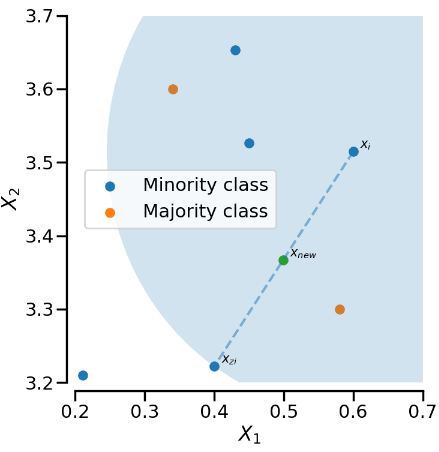

In [30]:
from imblearn.over_sampling import SMOTE 

#### Instanciando e fazendo fit

In [31]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

### Vsualizando graficamente

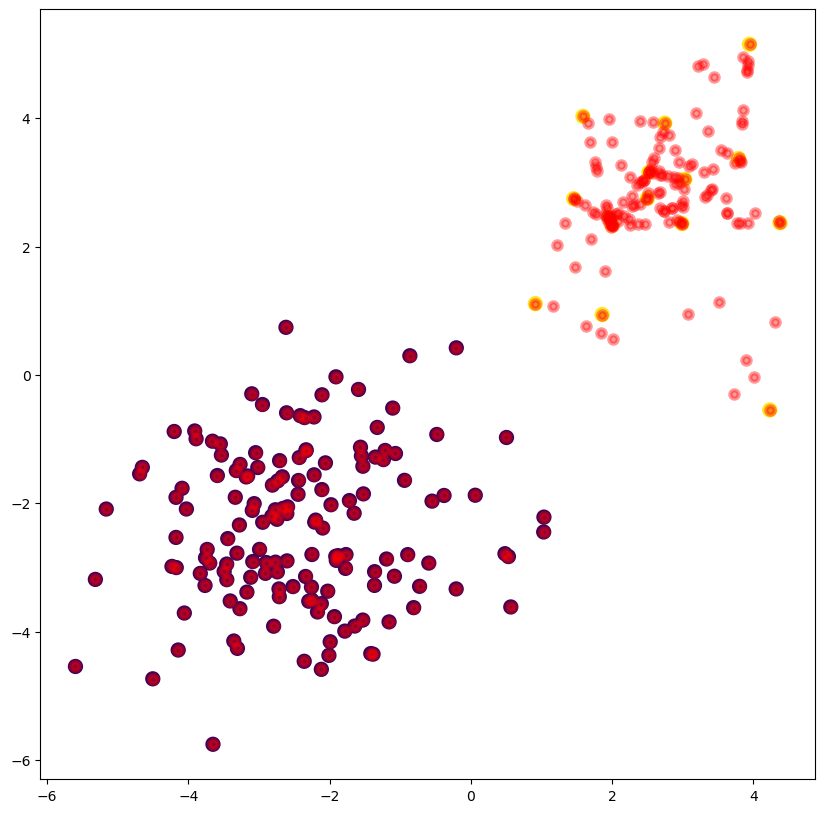

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.4)

plt.show()

# Adasyn

A principal diferença do ADASYN é que ele vai gerar mais observações para aqueles pontos que estiverem mais proximo da divisão, os pontos mais proximos da outra classe

In [38]:
from imblearn.over_sampling import ADASYN

### Instanciando e fazendo fit

In [39]:
 ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

### Vsualizando graficamente

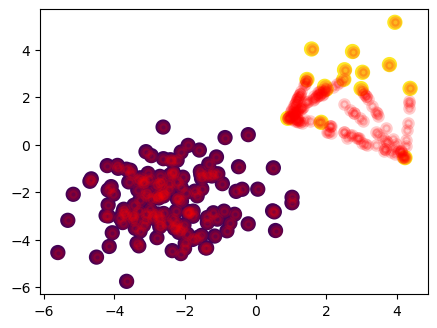

In [46]:
fig, ax = plt.subplots(figsize=(5,3.7))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.2)

plt.show()

**Também existem várias outras formas de fazermos o oversampling e todas elas são explicadas na própria documentação**<br>
**https://imbalanced-learn.org/stable/over_sampling.html**